# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

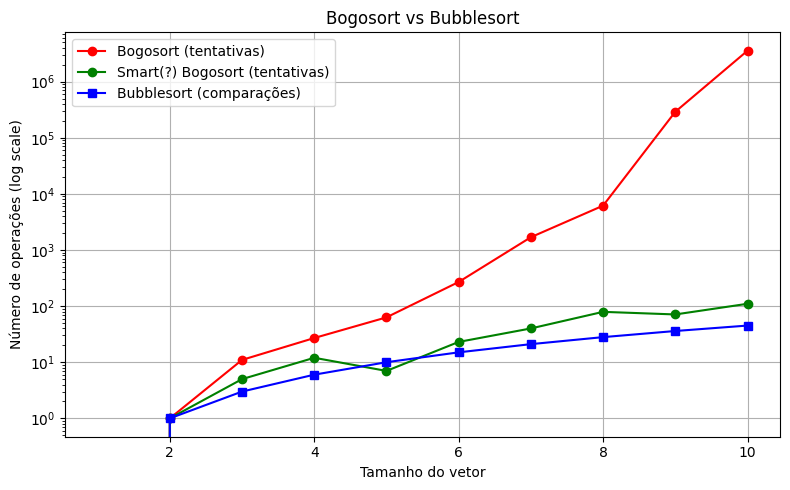

In [5]:
import random
import matplotlib.pyplot as plt

def is_sorted(arr):
    return all(arr[i] <= arr[i+1] for i in range(len(arr)-1))

def bogosort_count(arr):
    attempts = 0
    while not is_sorted(arr):
        random.shuffle(arr)
        attempts += 1
    return attempts

def smart_bogosort_count(arr):
    attempts = 0
    N = len(arr)
    while not is_sorted(arr):
        i = random.randint(0, N - 2)
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]  # troca se estiver fora de ordem
        attempts += 1
    return attempts

def bubblesort_count(arr):
    count = 0
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            count += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return count

# Testar vetores de tamanho 1 a 10
sizes = list(range(1, 11))
bogo_ops = []
bubble_ops = []
smart_bogo_ops = []

for n in sizes:
    v = list(range(n))
    random.shuffle(v)
    bogo_ops.append(bogosort_count(v.copy()))
    smart_bogo_ops.append(smart_bogosort_count(v.copy()))
    bubble_ops.append(bubblesort_count(v.copy()))


# Plot
plt.figure(figsize=(8, 5))
plt.plot(sizes, bogo_ops, 'o-', label='Bogosort (tentativas)', color='red')
plt.plot(sizes, smart_bogo_ops, 'o-', label='Smart(?) Bogosort (tentativas)', color='green')
plt.plot(sizes, bubble_ops, 's-', label='Bubblesort (comparações)', color='blue')
plt.yscale('log')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Número de operações (log scale)')
plt.title('Bogosort vs Bubblesort')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
